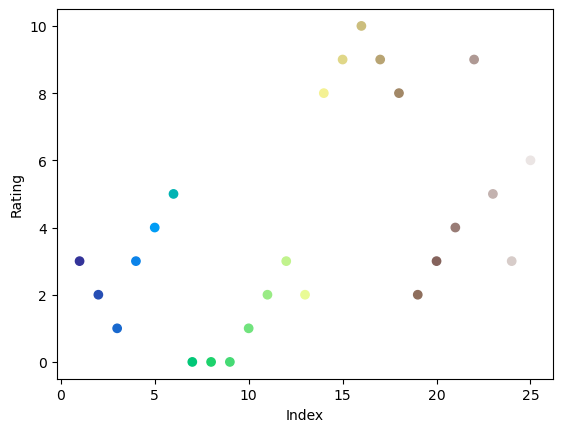

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def cluster(x, i, cache):
    if i > cache['Length']:
        return 0
    cache['Breaks'][i-1] = False
    if i + cache['n.min'] - 1 > cache['Length']:
        return float('inf')
    if np.isnan(cache['Cache'][i-1]):
        return cache['Cache'][i-1]
    
    n_min = cache['n.min'] + i - 1
    n_max = min(cache['n.max'] + i - 1, cache['Length'])
    
    if n_max < n_min:
        return 0
    
    values = [np.var(x[i-1:k]) + cluster(x, k+1, cache) for k in range(n_min, n_max+1)]
    j = np.argmin(values)
    
    cache['Breaks'][n_min + j - 1] = True
    cache['Cache'][i-1] = values[j]
    return values[j]

# The data
x = np.array([3,2,1,3,4,5,0,0,0,1,2,3,2,8,9,10,9,8,2,3,4,9,5,3,6])

# Initialize cache and perform clustering
n = len(x)

cache = {
    'n.min': 5,
    'n.max': 11,
    'Cache': np.full(n, np.nan),
    'Breaks': np.full(n+1, False),
    'Length': n
}
cluster(x, 1, cache)
cache['Breaks'][0] = True

# Display the results
breaks = np.where(cache['Breaks'])[0]
groups = np.cumsum(cache['Breaks'][:-1])
averages = [np.mean(x[groups == g]) for g in np.unique(groups)]
colors = plt.cm.terrain(np.arange(len(groups)) / len(groups))

plt.scatter(range(1, n+1), x, marker='o',c=colors)
plt.xlabel('Index')
plt.ylabel('Rating')
plt.show()


